# Get Data

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def fetch_page(url, retries=3, delay=2):
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            return response.text
        except Exception as e:
            print(f"Error fetching {url}: {e}")
            time.sleep(delay * (attempt + 1))
    return None


In [4]:
# Get data from e-commerce site
demo_url3 = "https://webscraper.io/test-sites/e-commerce/static/phones/touch"
html3 = fetch_page(demo_url3)
soup3 = BeautifulSoup(html3, "html.parser")

products3 = []
for item in soup3.select("div.thumbnail"):
    name = item.select_one("a.title").text.strip()
    price = item.select_one("h4.price").text.strip()
    description = item.select_one("p.description").text.strip()
    products3.append([name, price, description])

df_products3 = pd.DataFrame(products3, columns=["Name", "Price", "Description"])
df_products3.to_csv("demo_products_phones.csv", index=False)
df_products3.head()



,Name,Price,Description
0,Nokia 123,$24.99,7 day battery
1,LG Optimus,$57.99,"3.2"" screen"
2,Samsung Galaxy,$93.99,5 mpx. Android 5.0
3,Nokia X,$109.99,"Andoid, Jolla dualboot"
4,Sony Xperia,$118.99,"GPS, waterproof"


In [6]:
#Save csv
df_products3 = pd.DataFrame(products3, columns=["Name", "Price", "Description"])
df_products3.to_csv("demo_products_tablets.csv", index=False)
df_products3.head()

,Name,Price,Description
0,Nokia 123,$24.99,7 day battery
1,LG Optimus,$57.99,"3.2"" screen"
2,Samsung Galaxy,$93.99,5 mpx. Android 5.0
3,Nokia X,$109.99,"Andoid, Jolla dualboot"
4,Sony Xperia,$118.99,"GPS, waterproof"


In [7]:
df_products3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6 non-null      object
 1   Price        6 non-null      object
 2   Description  6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


# Data Cleaning and Preprocessing

In [8]:
df_products3["Price"] = df_products3["Price"].str.replace("$", "")
df_products3.head()

C:\Users\Pristine\AppData\Local\Temp\ipykernel_144616\1089548211.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_products3["Price"] = df_products3["Price"].str.replace("$", "")


,Name,Price,Description
0,Nokia 123,24.99,7 day battery
1,LG Optimus,57.99,"3.2"" screen"
2,Samsung Galaxy,93.99,5 mpx. Android 5.0
3,Nokia X,109.99,"Andoid, Jolla dualboot"
4,Sony Xperia,118.99,"GPS, waterproof"


In [9]:
#set to numeric
df_products3["Price"] = df_products3["Price"].astype(float)

In [10]:
df_products3["Price"].dtype

dtype('float64')

# Descriptive statistical

In [11]:
df_products3.describe()

,Price
count,6.000000
mean,150.990000
std,174.516475
min,24.990000
25%,66.990000
50%,101.990000
75%,116.740000
max,499.990000


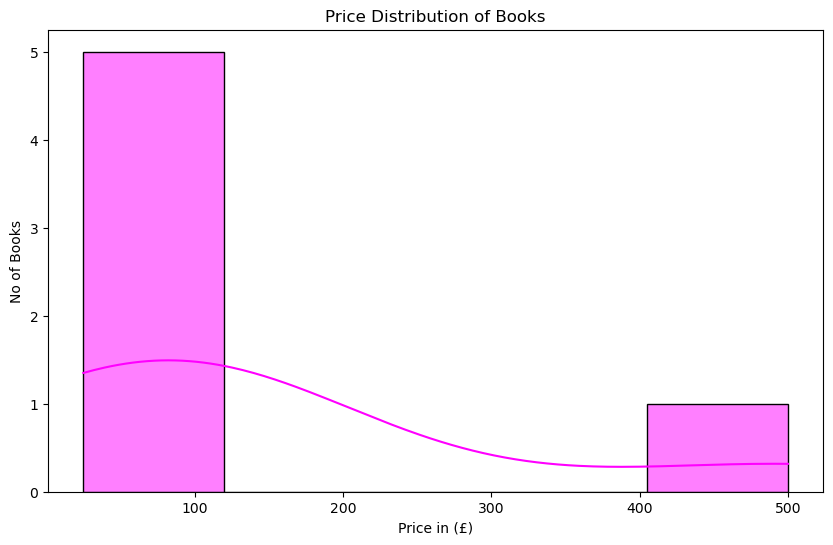

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df_products3["Price"], bins=5, kde=True, color='Magenta')
plt.title("Price Distribution of Books")
plt.xlabel("Price in (£)")
plt.ylabel("No of Books")
plt.show()
